In [203]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
import warnings
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [169]:
#Load data
heroes_info = pd.read_csv('superhero_info - superhero_info.csv') 
heroes_power = pd.read_csv('superhero_powers - superhero_powers.csv')

### Data Assessment

In [170]:
heroes_power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [171]:
heroes_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [172]:
heroes_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [173]:
heroes_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


### Data Cleaning

**We begin by cleaning heroes_power data**

In [174]:
# create a copy of heroes_power
power_clean = heroes_power.copy()

**1. one-hot-encoded columns for every power that appears in the dataset.**

In [175]:
# split power into a new column
power_clean['Power_list'] = heroes_power['Powers'].str.split(',')
power_clean.head()

,hero_names,Powers,Power_list
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [176]:
## exploding the column of lists
exploded = power_clean.explode('Power_list')
exploded.head(20)

,hero_names,Powers,Power_list
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Durability
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Longevity
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Super Strength
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Stamina
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Camouflage


In [177]:
## saving the unique values from the exploded column
cols_to_make = exploded['Power_list'].dropna().unique()
cols_to_make[: 20]

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring'], dtype=object)

In [178]:
# we filter warnings since this process will create many columns
warnings.filterwarnings('ignore')
#create a new column for each of our unique values that are stored in cols_to_make.
for col in cols_to_make:
    power_clean[col] = power_clean['Powers'].str.contains(col)

In [179]:
power_clean.head()

,hero_names,Powers,Power_list,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [180]:
power_clean.drop(columns= ['Power_list', 'Powers'], inplace=True)

In [181]:
power_clean.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Cleaning Heroes info column**

In [182]:
# Make a copy
info_clean = heroes_info.copy()

In [183]:
# Exploring format with few examples
info_clean['Hero|Publisher'].head(3)

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
2              Abin Sur|DC Comics
Name: Hero|Publisher, dtype: object

In [184]:
# split and set expand= True
info_clean['Hero|Publisher'].str.split('\|', expand= True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [185]:
## save the 2 new columns into the dataframe
info_clean[['Hero', 'Publisher']] = info_clean['Hero|Publisher'].str.split('\|', expand= True)

In [186]:
# view new columns having separate Hero and Pulisher
info_clean[['Hero', 'Publisher']].head()

,Hero,Publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics


In [187]:
# drop Hero|Publisher column
info_clean.drop(columns= ['Hero|Publisher'], inplace=True)
info_clean.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


**2. Separate Measurements Column into Height and Weight Column**

In [188]:
#Exploring format in Measurement column and applying transformation
measure = info_clean.loc[2,'Measurements']
measure

"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"

In [189]:
# Replace ' with ", to enable us apply json.loads()
measure = measure.replace("'", '"')
measure

'{"Height": "185.0 cm", "Weight": "90.0 kg"}'

In [190]:
## now we can use json.loads
fixed_measure = json.loads(measure)
print(type(fixed_measure))
fixed_measure

<class 'dict'>


{'Height': '185.0 cm', 'Weight': '90.0 kg'}

In [191]:
# Apply to entire measurement column
info_clean['Measurements'] = info_clean['Measurements'].str.replace("'", '"')
info_clean['Measurements'] = info_clean['Measurements'].apply(json.loads)
info_clean['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

**3. Extract Height and Weight from Measurements column into two new columns**

In [192]:
# Create two new columns, getting the height and weight from Measurements column
info_clean['Height'] = info_clean['Measurements'].apply(lambda x : x['Height'])
info_clean['Weight'] =  info_clean['Measurements'].apply(lambda x : x['Weight'])

In [193]:
#View two new columns
info_clean[['Height', 'Weight']].head()

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg


**4. Convert Height and Weight column object to INT**

In [194]:
# remove cm and kg from Height and Weight respectively
info_clean['Height'] = info_clean['Height'].str.replace(' cm', '')
info_clean['Weight'] = info_clean['Weight'].str.replace(' kg', '')
info_clean[['Height', 'Weight']].head()

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0


In [195]:
info_clean.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0,122.0


In [196]:
# convert height and weight to int
cols = ['Height', 'Weight']
for col in cols:
    info_clean[col] = info_clean[col].apply(lambda x: int(float(x)))

In [197]:
# observe height and weight datatype
info_clean[cols].dtypes

Height    int64
Weight    int64
dtype: object

In [198]:
# drop measurement column
info_clean.drop(columns=['Measurements'], inplace=True)

In [199]:
info_clean.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122


II. Use your combined DataFrame to answer the following questions.

* Compare the average weight of super powers who have Super Speed to those who do not.
* What is the average height of heroes for each publisher?

In [200]:
info_clean.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122


In [201]:
power_clean.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [202]:
## merge the 2 dataframes
merged = pd.merge(info_clean, power_clean, left_on='Hero', right_on='hero_names', how='inner')
merged.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90,...,False,False,False,False,False,False,False,False,False,False


**What is the average height of heroes for each publisher?**

In [206]:
avg_height= merged.groupby('Publisher')['Height'].mean().sort_values(ascending= False)
avg_height

Publisher
Image Comics         211.000000
Marvel Comics        191.545455
DC Comics            181.920290
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Dark Horse Comics    176.909091
Shueisha             171.500000
George Lucas         159.600000
Name: Height, dtype: float64

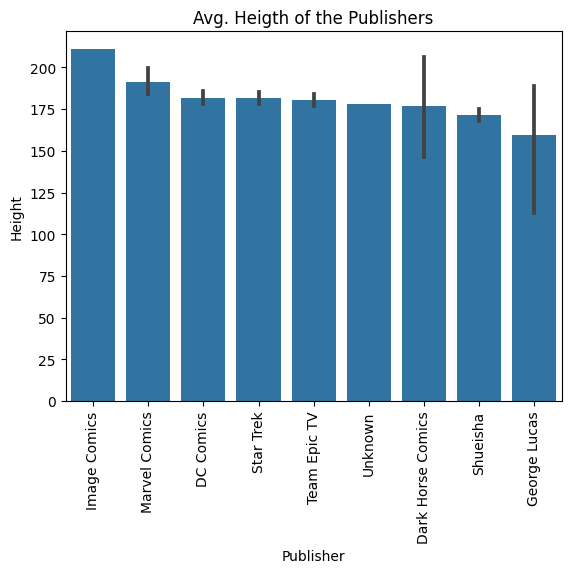

In [218]:
# Barchart in bivariate form
bar_order = avg_height.index
base_color = sb.color_palette()[0]
sb.barplot(data=merged, x='Publisher', y='Height', color=base_color, order= bar_order)
plt.xticks(rotation=90);
plt.title('Avg. Heigth of the Publishers');

The visual reveals that Image Comics publishers have the highest average height, Marvel Comics comes next and George Lucas Publishers are the least.

**Compare the average weight of super powers who have Super Speed to those who do not.**

In [212]:
merged['Super Speed'].unique()

array([False,  True])

In [216]:
avg_weight = merged.groupby('Super Speed')['Weight'].mean().sort_values(ascending= False)
avg_weight

Super Speed
True     129.404040
False    101.773585
Name: Weight, dtype: float64

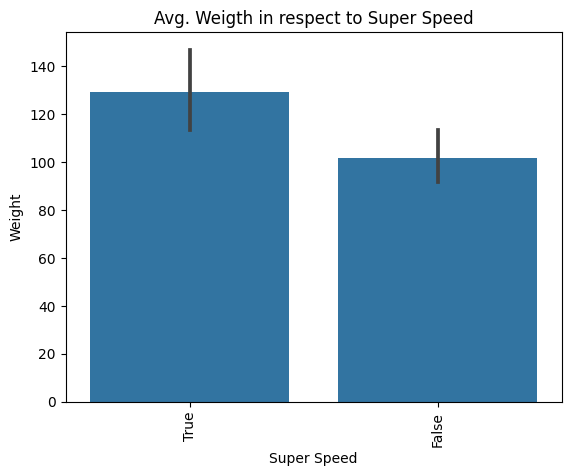

In [217]:
# Barchart in bivariate form
bar_order = avg_weight.index
base_color = sb.color_palette()[0]
sb.barplot(data=merged, x='Super Speed', y='Weight', color=base_color, order= bar_order)
plt.xticks(rotation=90);
plt.title('Avg. Weigth in respect to Super Speed');

True represent heroes with Super Speed while False represent Heroes without Super Speed.The Visual reveals that heroes with Super Speed have an Higher average weight than heroes without Super speed.